In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/content/results_final.csv')

In [3]:
#Get rid of the '\n' in the data

data = data.replace('\n','', regex=True) 
data = data.replace('\r', '', regex=True)

In [4]:
np.asarray(np.matrix(data.sol[0])).flatten() 

array([-98.99727937, -80.81590316, -59.33472761, -40.54628748,
       -19.54842635,  -0.37386838,  20.30782531,  39.74963143,
        60.20016319,  79.84324401, 100.11978177, 119.90204604,
       140.00075103, 159.59909261, 178.63535713, 195.71814051,
       209.68379363, 219.43119896, 225.33930754, 228.55884647,
       230.32191015])

In [ ]:
#Converting to list for plotty plot plots
for i in range(data.shape[0]):
  data.xvals[i] = np.asarray(np.matrix(data.xvals[i])).flatten() 
  data.sol[i] = np.asarray(np.matrix(data.sol[i])).flatten() 
  data.num_steps[i] = np.asarray(np.matrix(data.num_steps[i])).flatten() 

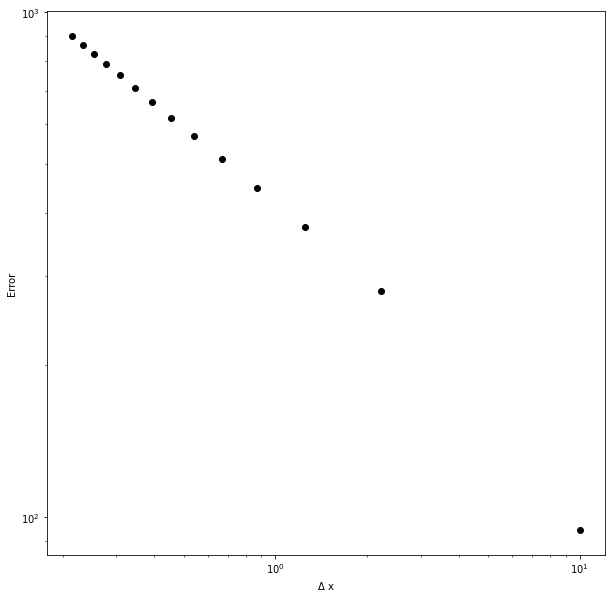

In [26]:
L = 200
t_0 = 0
t_final = 100
u_true = lambda x,t: x+t
ms = [20,90,160,230,300,370,440,510,580,650,720,790,860,930]
ms = np.asarray(ms)

#Corresponding entries # in the data row with the ms
comb = [13,27,41,55,69,83,97,111,125,139,153,167,181,195]
comb = np.asarray(comb)

gg = np.stack((ms,comb),axis=-1)

errors = [] 
delta_xs = []
order_C = lambda delta_x, error, order: np.exp(np.log(error) - order * np.log(delta_x))


for m,c in gg:
  x = np.linspace(-L, L, m+1)
  delta_x = L / float(m)
  delta_xs.append(delta_x)

  approx_sol = data.sol[c]
  true_sol = u_true(data.xvals[c], t_final)
  diff = np.linalg.norm(approx_sol - true_sol)
  errors.append(diff)

plt.figure(figsize=(10,10))
plt.loglog(delta_xs, errors, 'ko', label='True Error')
plt.xlabel('$\Delta$ x')
plt.ylabel('Error')

delta_xs = np.array(delta_xs)
errors = np.array(errors)